In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy
from scipy import stats

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("SciPy:", scipy.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)

NumPy: 1.26.4
Pandas: 2.2.2
SciPy: 1.13.1
Matplotlib: 3.10.8
Seaborn: 0.13.2


In [13]:
data = """list of distances between Sec23 and COP1 puncta from fluorescence data"""

numbers = [float(x) for x in data.split()]

df = pd.DataFrame(numbers, columns=["Sec23_COP1_0.5_um"])
print(df)

      Sec23_COP1_0.5
0             0.0797
1             0.4970
2             0.2030
3             0.2270
4             0.1700
...              ...
1211          0.2790
1212          0.1000
1213          0.0957
1214          0.1380
1215          0.0816

[1216 rows x 1 columns]


In [14]:
#convert to nm 
df["Sec23_COP1_0.5_nm"] = df["Sec23_COP1_0.5_um"] * 1000


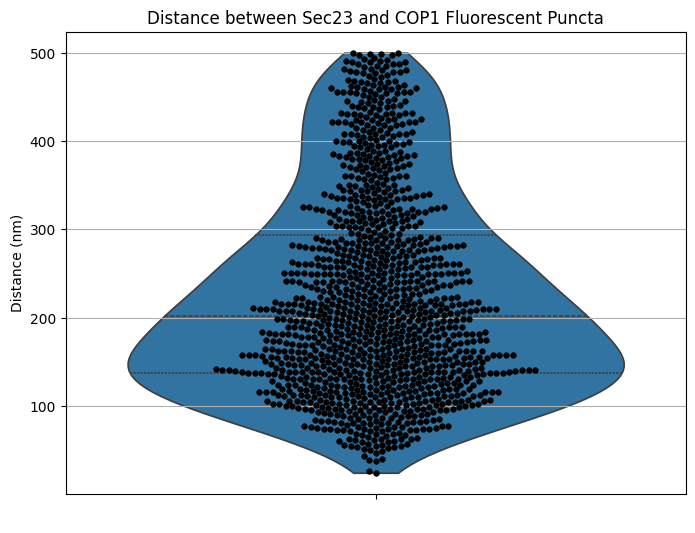

In [16]:
#plot fluoro

plt.figure(figsize=(8,6))
sns.violinplot(data=df, y='Sec23_COP1_0.5_nm', inner="quart", cut=0)
plt.title('Distance between Sec23 and COP1 Fluorescent Puncta')
plt.xlabel(' ')
plt.ylabel('Distance (nm)')
plt.grid(True)


sns.swarmplot(data=df, y='Sec23_COP1_0.5_nm', size=4, color = 'black', edgecolor='black', linewidth=0.5)

plt.show()


In [17]:
data_tomo = """List of distances between clusters of COP2 and COP1 from tomography data"""

numbers_tomo = [float(x) for x in data_tomo.split()]

tomo_df = pd.DataFrame(numbers_tomo, columns=["COP2_COP1_nm"])
print(tomo_df)

     COP2_COP1
0   185.269666
1   104.478315
2   138.309753
3   165.034224
4   175.902195
5   146.555599
6   161.003844
7    90.976512
8    88.301109
9   119.596365
10  398.937027
11   69.440993
12  229.658601
13  197.947706
14  268.080191
15  176.999109
16  166.632434
17  249.707464
18  199.487048
19  154.168692
20   89.013090
21  182.864247
22  140.080216
23  359.920110
24   95.317907
25   76.410989
26  146.796967
27  142.179122
28  142.838133
29  190.993411
30  112.139621
31  359.305619
32  241.147951
33   87.848192
34  125.348022
35  235.898871
36  229.167963
37  126.991748
38  389.478495
39  233.349233
40  272.557019
41  113.676287
42   76.202048
43  190.409817


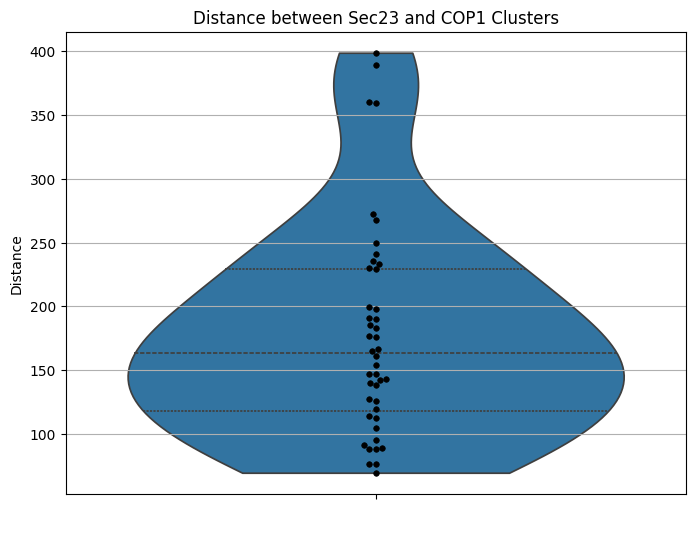

In [18]:
#plot clusters

plt.figure(figsize=(8,6))
sns.violinplot(data=tomo_df, y='COP2_COP1_nm', inner="quart", cut=0)
plt.title('Distance between Sec23 and COP1 Clusters')
plt.xlabel(' ')
plt.ylabel('Distance')
plt.grid(True)


sns.swarmplot(data=tomo_df, y='COP2_COP1_nm', size=4, color = 'black', edgecolor='black', linewidth=0.5)

plt.show()


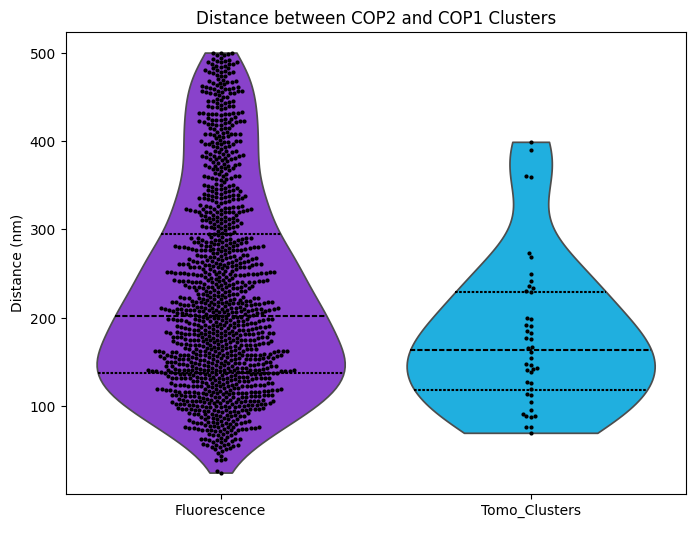

In [50]:
#plot both

plt.figure(figsize=(8,6))


ax=sns.violinplot(
    data=[df["Sec23_COP1_0.5_nm"], tomo_df["COP2_COP1_nm"]], inner="quart", cut=0, palette=["blueviolet", "deepskyblue"])
for line in ax.lines:
    line.set_color("black")
    line.set_linewidth(1.5)
plt.xticks([0, 1], ["Fluorescence", "Tomo_Clusters"])
plt.title('Distance between COP2 and COP1 Clusters')
plt.xlabel(' ')
plt.ylabel('Distance (nm)')
plt.grid(False)

sns.swarmplot(data=[df["Sec23_COP1_0.5_nm"], tomo_df["COP2_COP1_nm"]], size=3, color = 'black')

plt.savefig('Distance between COP2 and COP1 clusters swarm.pdf',format='pdf', bbox_inches='tight')


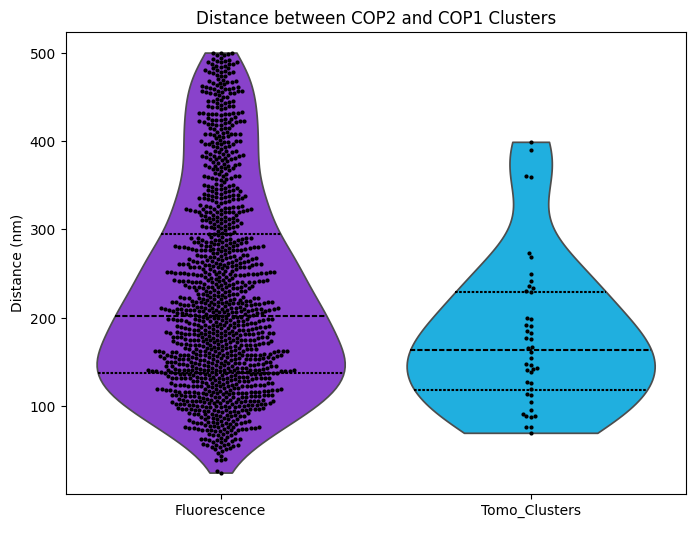

In [50]:
#plot both

plt.figure(figsize=(8,6))


ax=sns.violinplot(
    data=[tomo_df["COP2_COP1_nm"]], inner="quart", cut=0, palette=["deepskyblue"])
for line in ax.lines:
    line.set_color("black")
    line.set_linewidth(1.5)
plt.xticks([0], ["Tomo_Clusters"])
plt.title('Distance between COP2 and COP1 Clusters')
plt.xlabel(' ')
plt.ylabel('Distance (nm)')
plt.grid(False)

sns.swarmplot(data=[tomo_df["COP2_COP1_nm"]], size=3, color = 'black')

plt.savefig('Distance between COP2 and COP1 clusters swarm.pdf',format='pdf', bbox_inches='tight')


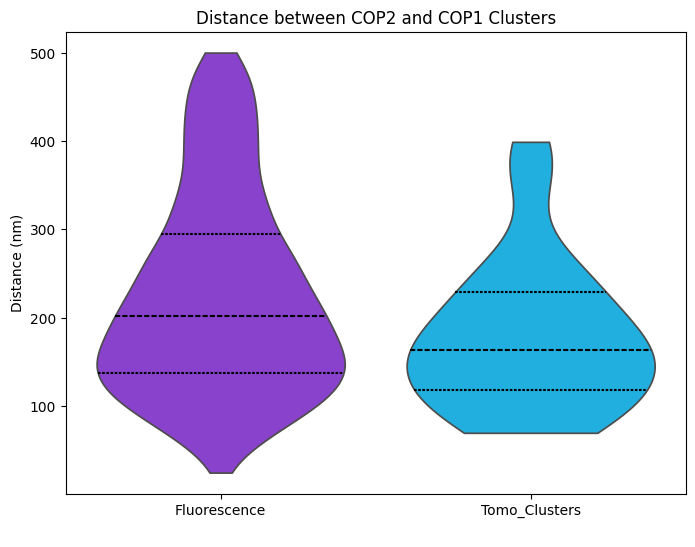

In [49]:
#plot both

plt.figure(figsize=(8,6))


ax = sns.violinplot(
    data=[df["Sec23_COP1_0.5_nm"], tomo_df["COP2_COP1_nm"]], inner="quart", cut=0, palette=["blueviolet", "deepskyblue"])

for line in ax.lines:
    line.set_color("black")
    line.set_linewidth(1.5)
plt.xticks([0, 1], ["Fluorescence", "Tomo_Clusters"])
plt.title('Distance between COP2 and COP1 Clusters')
plt.xlabel(' ')
plt.ylabel('Distance (nm)')
plt.grid(False)

plt.savefig('Distance between COP2 and COP1 clusters.pdf',format='pdf', bbox_inches='tight')



In [45]:
fluoro_median = df['Sec23_COP1_0.5_nm'].median()
print(fluoro_median)

tomo_median = tomo_df['COP2_COP1'].median()
print(tomo_median)

202.0
163.01903399999998


In [46]:
# Filter the data for COP1 and COP2 vesicles
group1 = df['Sec23_COP1_0.5_nm']

group2 = tomo_df['COP2_COP1']

# Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U test: U={u_stat}, p={p_value_mw}")

# Kolmogorov-Smirnov test
ks_stat, p_value_ks = stats.ks_2samp(group1, group2)
print(f"Kolmogorov-Smirnov test: KS={ks_stat}, p={p_value_ks}")

Mann-Whitney U test: U=33092.0, p=0.0075040065190697626
Kolmogorov-Smirnov test: KS=0.23302930622009568, p=0.01640233478314958
